In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import load_preprocessed_file,get_monthly_averages,\
                  compute_anomalies, plot_anomaly_graph

In [2]:
BUOYNO=44005
df=load_preprocessed_file(BUOYNO)
df = df[df.index.map(lambda x:x.year)!=1978] # drop 1978, which only has atmp
df.head(6)

,ATMP,WTMP
timestamp,,
1979-01-01 00:00:00,4.8,6.9
1979-01-01 03:00:00,5.0,6.8
1979-01-01 06:00:00,5.2,6.8
1979-01-01 09:00:00,5.8,7.1
1979-01-01 12:00:00,5.9,7.1
1979-01-01 15:00:00,7.0,7.0


In [3]:
monthly=get_monthly_averages(df)
monthly.head()

,ATMP,WTMP
1979-01,1.579920,6.562651
1979-02,-3.054545,4.880455
1979-03,2.888750,3.951029
1979-04,4.923789,5.178855
1979-05,10.749718,9.712958


In [4]:
all_months_air = compute_anomalies(monthly, 'ATMP')
all_months_air.head()


,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Jan,1.126518,0.680785,-3.461489,-2.189212,1.757560,0.666949,-1.038516,1.436384,1.062181,-0.044911,...,-1.523649,-2.020115,0.296188,-0.580351,1.399230,NaN,NaN,-0.738801,1.594109,2.581861
Feb,-3.400481,-1.138678,NaN,0.072396,1.634065,3.193202,1.567115,-0.275152,-0.567043,0.662422,...,NaN,0.260941,0.694065,0.133344,2.088741,NaN,NaN,-4.133189,1.637326,1.944261
Mar,0.909195,0.532709,1.250411,0.397483,2.503163,-0.976455,1.221794,1.116944,-0.558098,-0.102174,...,-0.010574,-0.178743,2.151121,0.521925,2.520310,NaN,-0.046678,-1.397130,1.593966,-1.530164
Apr,-0.462571,0.654990,0.612565,-0.506416,0.423611,-0.412054,0.122959,0.134456,-0.750110,NaN,...,-0.885253,1.000493,1.729489,0.560168,1.693918,NaN,-0.005049,-0.234180,-0.156499,0.736450
May,1.773718,-0.047363,-0.248290,-0.408166,-0.477343,-0.196080,-0.416107,2.640667,-1.273981,NaN,...,NaN,0.795952,1.951261,0.027630,1.921447,NaN,0.075688,0.870362,0.473060,0.257240


In [5]:
yearly_means = all_months_air.mean()
print(yearly_means.index[0], yearly_means[0])
print(yearly_means.index[-1], yearly_means[-1])
yearly_means.head()

1979 0.08965375398209419
2017 1.1094250353803317


1979    0.089654
1980   -0.448972
1981    0.297388
1982   -0.324272
1983    0.418257
Freq: A-DEC, dtype: float64

Got error attempting to fit line: SVD did not converge in Linear Least Squares
Creating a line just using the endpoint years (1979, 2017)


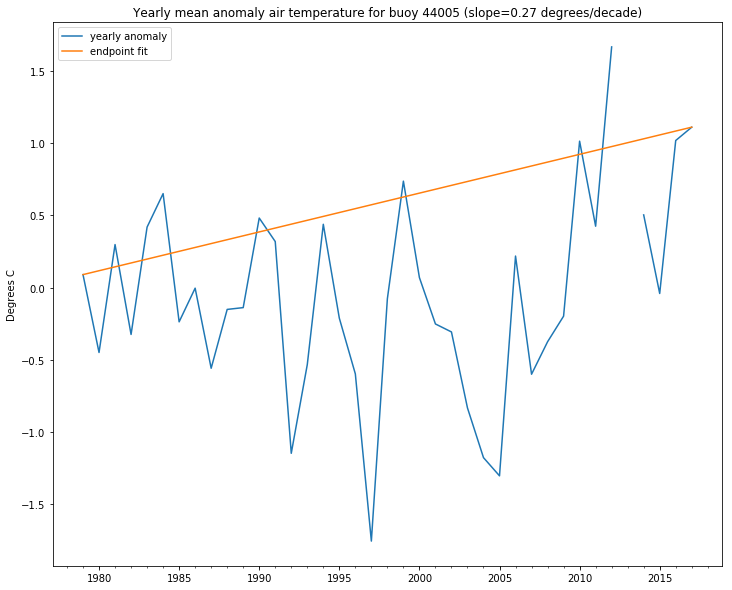

In [6]:
air_slope = plot_anomaly_graph(BUOYNO, 'air', all_months_air)


In [7]:
all_months_water = compute_anomalies(monthly, 'WTMP')
all_months_water.head()

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Jan,0.415964,1.202573,-0.827964,-0.021146,0.967386,-0.323641,0.932745,0.257480,0.571877,-2.080649,...,-0.330984,-0.558535,-0.127980,-0.111659,1.186377,NaN,NaN,1.461893,1.175117,1.316705
Feb,0.083459,0.655109,NaN,0.031160,1.355243,0.647321,1.186160,0.529811,-0.596547,-1.197284,...,NaN,-0.144002,-0.721430,-0.221620,1.261134,NaN,NaN,0.641194,0.993467,0.936639
Mar,-0.269864,0.857649,0.648467,-0.169141,1.316704,0.833419,1.413790,0.813763,-1.243565,-0.392917,...,-0.114819,-0.278268,0.098863,0.178298,1.799834,NaN,-0.201381,-0.544657,1.214638,0.396563
Apr,0.179707,1.342484,0.427043,-0.197206,0.270650,0.342241,0.587083,0.863557,-1.011370,NaN,...,-0.953192,0.219174,0.943069,0.006686,1.947380,NaN,-0.057773,-0.443419,0.752380,0.316291
May,1.877090,0.848072,0.271015,NaN,-0.205556,-0.712148,-0.381628,1.861569,-1.447846,NaN,...,NaN,0.666035,1.438268,-0.188690,2.361982,NaN,0.388658,0.666160,1.012654,0.278999


Got error attempting to fit line: SVD did not converge in Linear Least Squares
Creating a line just using the endpoint years (1979, 2017)


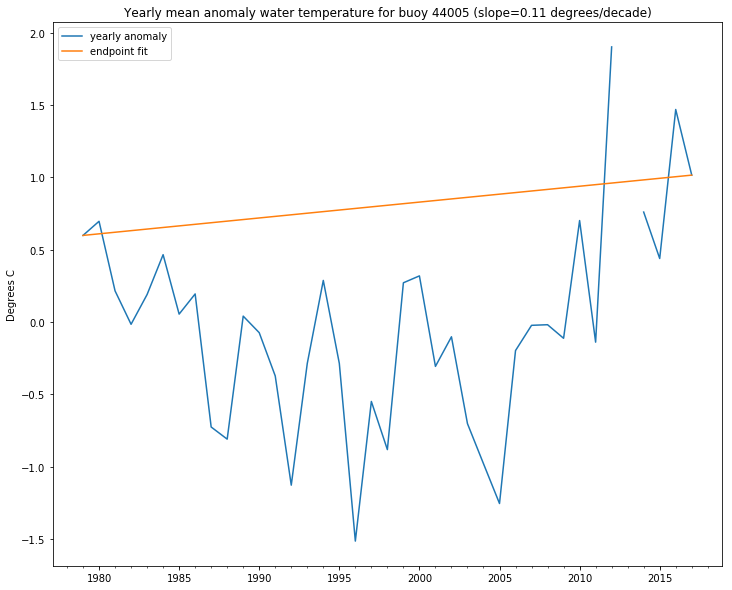

In [8]:
water_slope = plot_anomaly_graph(BUOYNO, 'water', all_months_water)


In [9]:
from dataworkspaces.kits.jupyter import NotebookLineageBuilder
with NotebookLineageBuilder('../results',
                            run_description="compute air and water anomaly for buoy %s" % BUOYNO)\
       .with_parameters({'buoy':BUOYNO})\
       .with_input_path('../intermediate-data/processed_%s.csv.gz'%BUOYNO)\
       .eval() as lineage:
    lineage.write_results({'air_slope':round(air_slope,3),
                          'water_slope':round(water_slope, 3),
                          'units':'degrees C per decade'})
print("Results:")
print("  Air slope:   %.3f degrees C per decade" % air_slope)
print("  Water slope: %.3f degrees C per decade" % water_slope)

Wrote results to results:results.json
Results:
  Air slope:   0.268 degrees C per decade
  Water slope: 0.110 degrees C per decade
